# Titanic Tutorial by YouhanLee - 3rd Try

In [144]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# seaborn setting
plt.style.use('seaborn')
sns.set(font_scale=2.5)

import missingno as msno

# ignore warnings
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

## 1. Load Dataset

In [145]:
df_train = pd.read_csv('../data/train.csv')
df_test = pd.read_csv('../data/test.csv')

In [146]:
df_train.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S

In [147]:
df_test.head()

PassengerId  Pclass                                          Name     Sex  \
0          892       3                              Kelly, Mr. James    male   
1          893       3              Wilkes, Mrs. James (Ellen Needs)  female   
2          894       2                     Myles, Mr. Thomas Francis    male   
3          895       3                              Wirz, Mr. Albert    male   
4          896       3  Hirvonen, Mrs. Alexander (Helga E Lindqvist)  female   

    Age  SibSp  Parch   Ticket     Fare Cabin Embarked  
0  34.5      0      0   330911   7.8292   NaN        Q  
1  47.0      1      0   363272   7.0000   NaN        S  
2  62.0      0      0   240276   9.6875   NaN        Q  
3  27.0      0      0   315154   8.6625   NaN        S  
4  22.0      1      1  3101298  12.2875   NaN        S

In [148]:
df_train.describe()

PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200

In [149]:
df_test.describe()

PassengerId      Pclass         Age       SibSp       Parch        Fare
count   418.000000  418.000000  332.000000  418.000000  418.000000  417.000000
mean   1100.500000    2.265550   30.272590    0.447368    0.392344   35.627188
std     120.810458    0.841838   14.181209    0.896760    0.981429   55.907576
min     892.000000    1.000000    0.170000    0.000000    0.000000    0.000000
25%     996.250000    1.000000   21.000000    0.000000    0.000000    7.895800
50%    1100.500000    3.000000   27.000000    0.000000    0.000000   14.454200
75%    1204.750000    3.000000   39.000000    1.000000    0.000000   31.500000
max    1309.000000    3.000000   76.000000    8.000000    9.000000  512.329200

### 1.1. Check Null Data

In [150]:
# train Îç∞Ïù¥ÌÑ∞
for col in df_train.columns:
    msg = 'ÌîºÏ≤ò : {:>12}\t NaN Îç∞Ïù¥ÌÑ∞ ÎπÑÏú® : {:.2f}%'.format(
        col, 100*(df_train[col].isnull().sum() / df_train[col].shape[0]))
    print(msg)

ÌîºÏ≤ò :  PassengerId	 NaN Îç∞Ïù¥ÌÑ∞ ÎπÑÏú® : 0.00%
ÌîºÏ≤ò :     Survived	 NaN Îç∞Ïù¥ÌÑ∞ ÎπÑÏú® : 0.00%
ÌîºÏ≤ò :       Pclass	 NaN Îç∞Ïù¥ÌÑ∞ ÎπÑÏú® : 0.00%
ÌîºÏ≤ò :         Name	 NaN Îç∞Ïù¥ÌÑ∞ ÎπÑÏú® : 0.00%
ÌîºÏ≤ò :          Sex	 NaN Îç∞Ïù¥ÌÑ∞ ÎπÑÏú® : 0.00%
ÌîºÏ≤ò :          Age	 NaN Îç∞Ïù¥ÌÑ∞ ÎπÑÏú® : 19.87%
ÌîºÏ≤ò :        SibSp	 NaN Îç∞Ïù¥ÌÑ∞ ÎπÑÏú® : 0.00%
ÌîºÏ≤ò :        Parch	 NaN Îç∞Ïù¥ÌÑ∞ ÎπÑÏú® : 0.00%
ÌîºÏ≤ò :       Ticket	 NaN Îç∞Ïù¥ÌÑ∞ ÎπÑÏú® : 0.00%
ÌîºÏ≤ò :         Fare	 NaN Îç∞Ïù¥ÌÑ∞ ÎπÑÏú® : 0.00%
ÌîºÏ≤ò :        Cabin	 NaN Îç∞Ïù¥ÌÑ∞ ÎπÑÏú® : 77.10%
ÌîºÏ≤ò :     Embarked	 NaN Îç∞Ïù¥ÌÑ∞ ÎπÑÏú® : 0.22%


In [151]:
# test Îç∞Ïù¥ÌÑ∞
for col in df_test.columns:
    msg = 'ÌîºÏ≤ò : {:>12}\t NaN Îç∞Ïù¥ÌÑ∞ ÎπÑÏú® : {:.2f}%'.format(
        col, 100*(df_test[col].isnull().sum() / df_test[col].shape[0]))
    print(msg)

ÌîºÏ≤ò :  PassengerId	 NaN Îç∞Ïù¥ÌÑ∞ ÎπÑÏú® : 0.00%
ÌîºÏ≤ò :       Pclass	 NaN Îç∞Ïù¥ÌÑ∞ ÎπÑÏú® : 0.00%
ÌîºÏ≤ò :         Name	 NaN Îç∞Ïù¥ÌÑ∞ ÎπÑÏú® : 0.00%
ÌîºÏ≤ò :          Sex	 NaN Îç∞Ïù¥ÌÑ∞ ÎπÑÏú® : 0.00%
ÌîºÏ≤ò :          Age	 NaN Îç∞Ïù¥ÌÑ∞ ÎπÑÏú® : 20.57%
ÌîºÏ≤ò :        SibSp	 NaN Îç∞Ïù¥ÌÑ∞ ÎπÑÏú® : 0.00%
ÌîºÏ≤ò :        Parch	 NaN Îç∞Ïù¥ÌÑ∞ ÎπÑÏú® : 0.00%
ÌîºÏ≤ò :       Ticket	 NaN Îç∞Ïù¥ÌÑ∞ ÎπÑÏú® : 0.00%
ÌîºÏ≤ò :         Fare	 NaN Îç∞Ïù¥ÌÑ∞ ÎπÑÏú® : 0.24%
ÌîºÏ≤ò :        Cabin	 NaN Îç∞Ïù¥ÌÑ∞ ÎπÑÏú® : 78.23%
ÌîºÏ≤ò :     Embarked	 NaN Îç∞Ïù¥ÌÑ∞ ÎπÑÏú® : 0.00%


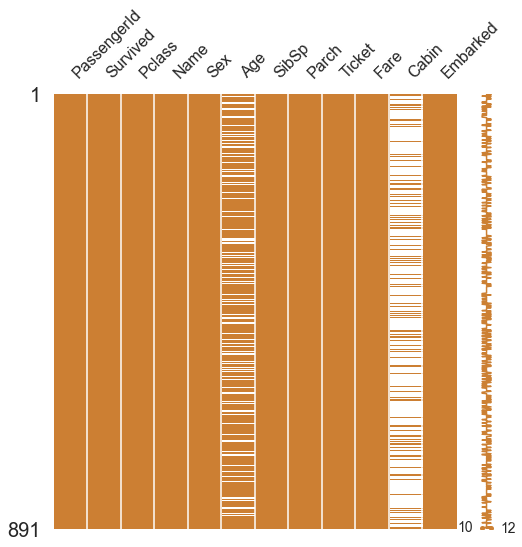

In [152]:
# train Îç∞Ïù¥ÌÑ∞Ïùò null Îç∞Ïù¥ÌÑ∞ ÏãúÍ∞ÅÌôî - matrix
msno.matrix(df=df_train.iloc[:, :], figsize=(8, 8), color=(0.8, 0.5, 0.2))

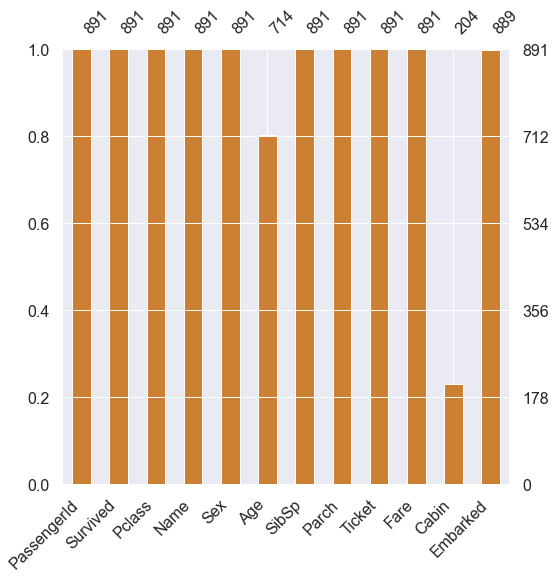

In [153]:
# train Îç∞Ïù¥ÌÑ∞Ïùò null Îç∞Ïù¥ÌÑ∞ ÏãúÍ∞ÅÌôî - barplot
msno.bar(df=df_train.iloc[:, :], figsize=(8, 8), color=(0.8, 0.5, 0.2))

### 1.2. Check Target Label

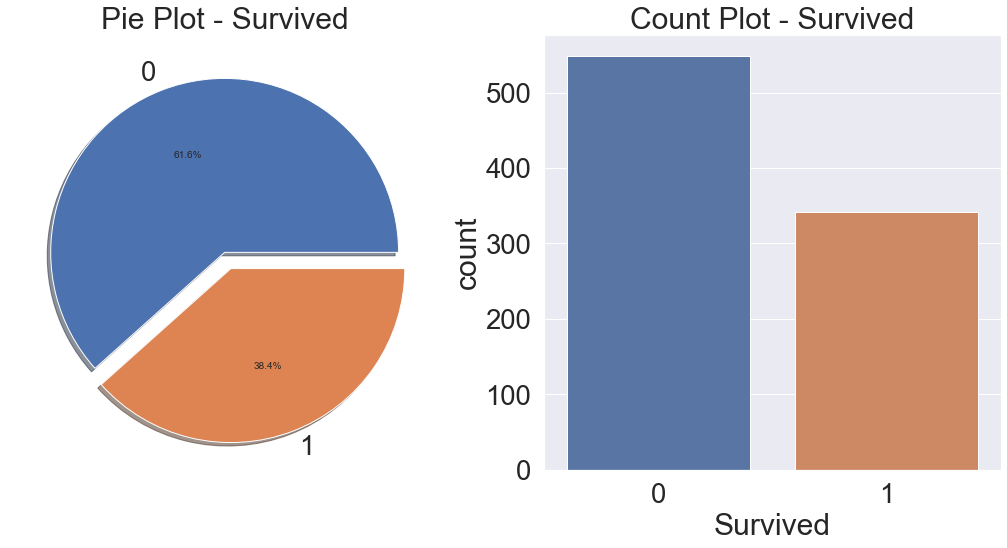

In [154]:
f, ax = plt.subplots(1, 2, figsize=(18, 8))

# ÏÉùÏ°¥Ïûê/ÏÇ¨ÎßùÏûê ÎπÑÏú® - pie plot
df_train['Survived'].value_counts().plot.pie(explode=[0,0.1], autopct='%1.1f%%', ax=ax[0], shadow=True)
ax[0].set_title('Pie Plot - Survived')
ax[0].set_ylabel('')

# ÏÉùÏ°¥Ïûê/ÏÇ¨ÎßùÏûê Ïàò - countplot
sns.countplot('Survived', data=df_train, ax=ax[1])
ax[1].set_title('Count Plot - Survived')

plt.show()

## 2. Exploratory Data Analysis

### 2.1. Pclass - Categorical, Ordinal

In [155]:
# Pclass Î≥Ñ ÏäπÏÑ†Í∞ù Ïàò - count()
df_train[['Pclass', 'Survived']].groupby(['Pclass'], as_index=True).count()

Survived
Pclass          
1            216
2            184
3            491

In [156]:
# Pclass Î≥Ñ ÏÉùÏ°¥Ïûê Ïàò - sum()
df_train[['Pclass', 'Survived']].groupby(['Pclass'], as_index=True).sum()

Survived
Pclass          
1            136
2             87
3            119

In [157]:
# Pclass Î≥Ñ ÏÉùÏ°¥Ïûê/ÏÇ¨ÎßùÏûê Ïàò - crosstab
pd.crosstab(df_train['Pclass'], df_train['Survived'],
            margins=True).style.background_gradient(cmap='summer_r')

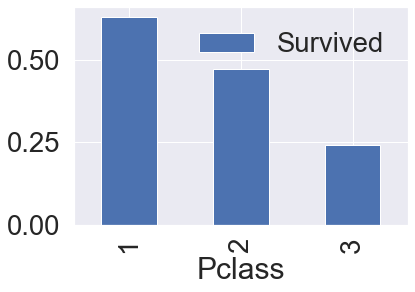

In [158]:
# PclassÎ≥Ñ ÌèâÍ∑† ÏÉùÏ°¥Î•† - barplot
df_train[['Pclass', 'Survived']].groupby(['Pclass'], as_index=True).mean(
).sort_values(by='Survived', ascending=False).plot.bar()

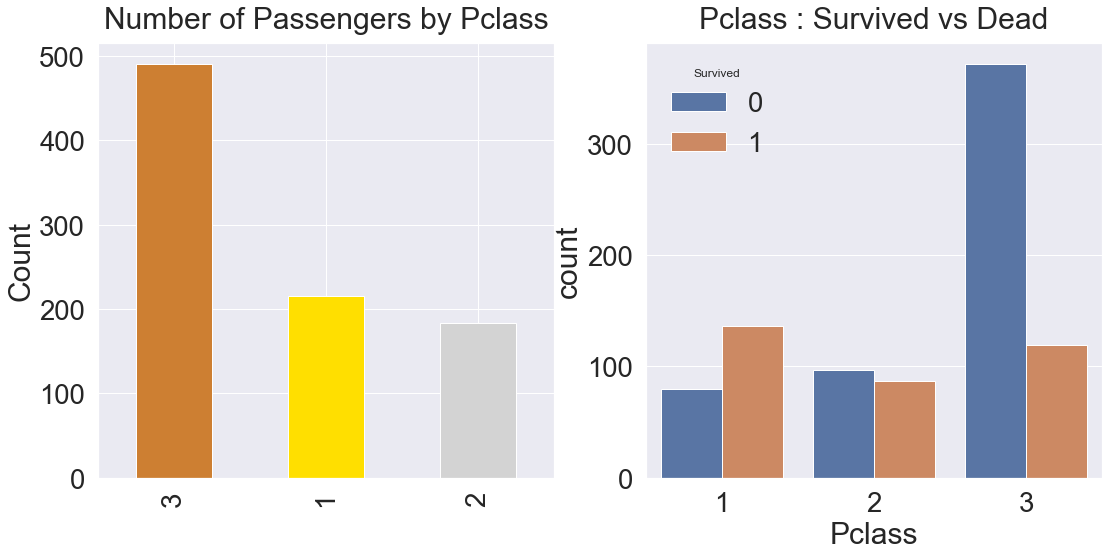

In [159]:
y_position = 1.02

f, ax = plt.subplots(1, 2, figsize=(18, 8))

# PclassÎ≥Ñ ÏäπÏÑ†Í∞ù Ïàò - barplot
df_train['Pclass'].value_counts().plot.bar(
    color=['#CD7F32', '#FFDF00', '#D3D3D3'], ax=ax[0])
ax[0].set_title('Number of Passengers by Pclass', y=y_position)
ax[0].set_ylabel('Count')

# PclassÎ≥Ñ ÏÉùÏ°¥Ïûê/ÏÇ¨ÎßùÏûê Ïàò - countplot
sns.countplot('Pclass', hue='Survived', data=df_train, ax=ax[1])
ax[1].set_title('Pclass : Survived vs Dead', y=y_position)

plt.show()

`üîç OBSERVATION`   
* **Pclass**Í∞Ä ÎÜíÏùÑÏàòÎ°ù ÏÉùÏ°¥Î•†Ïù¥ ÎÜíÎã§.

### 2.2. Sex - Categorical

In [160]:
# Í∞Å ÏÑ±Î≥ÑÏùò ÏÉùÏ°¥Ïûê/ÏÇ¨ÎßùÏûê Ïàò - crosstab
pd.crosstab(df_train['Sex'], df_train['Survived'],
            margins=True).style.background_gradient(cmap='summer_r')

In [161]:
# Í∞Å ÏÑ±Î≥ÑÏùò ÌèâÍ∑† ÏÉùÏ°¥Î•† - mean()
df_train[['Sex', 'Survived']].groupby(
    ['Sex'], as_index=True).mean().sort_values(by='Survived', ascending=True)

Survived
Sex             
male    0.188908
female  0.742038

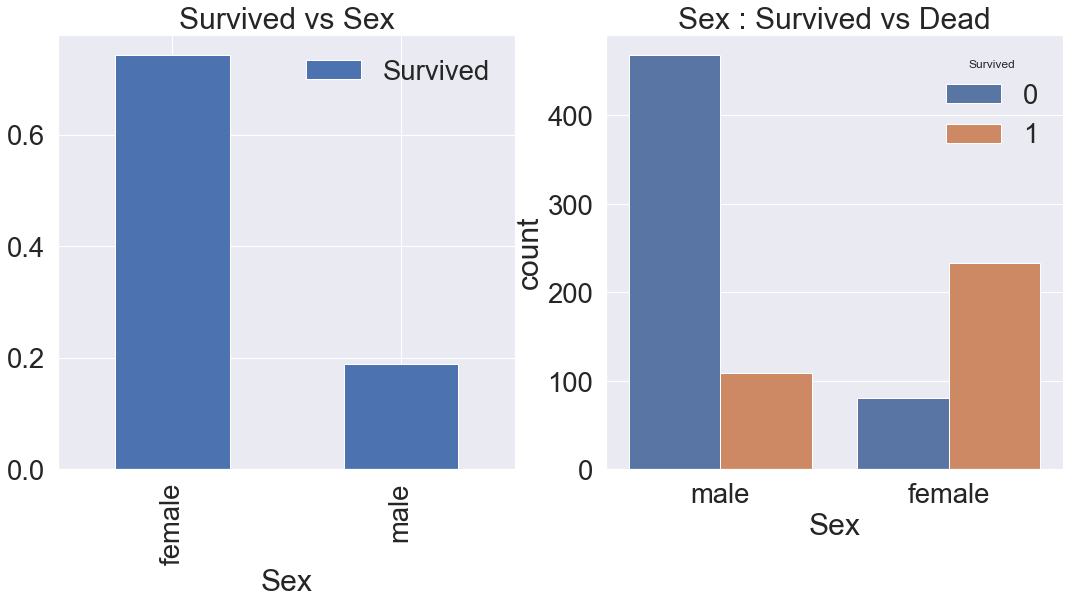

In [162]:
f, ax = plt.subplots(1, 2, figsize=(18,8))

# Í∞Å ÏÑ±Î≥Ñ ÌèâÍ∑† ÏÉùÏ°¥Î•† - barplot
df_train[['Sex', 'Survived']].groupby(['Sex'], as_index=True).mean().plot.bar(ax=ax[0])
ax[0].set_title('Survived vs Sex')

# Í∞Å ÏÑ±Î≥Ñ ÏÉùÏ°¥Ïûê/ÏÇ¨ÎßùÏûê Ïàò - countplot
sns.countplot('Sex', hue='Survived', data=df_train, ax=ax[1])
ax[1].set_title('Sex : Survived vs Dead')

plt.show()

`üîç OBSERVATION`   
* **Ïó¨ÏÑ±**ÏùºÏàòÎ°ù ÏÉùÏ°¥Î•†Ïù¥ ÎÜíÎã§.

### 2.3. Both Sex and Pclass

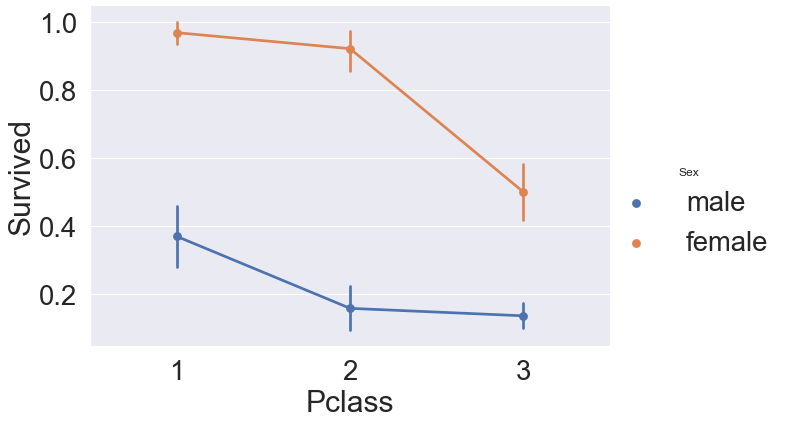

In [163]:
# Pclass, Sex Î≥Ñ ÌèâÍ∑† ÏÉùÏ°¥Î•† - factorplot
sns.factorplot('Pclass', 'Survived', hue='Sex',
               data=df_train, size=6, aspect=1.5)

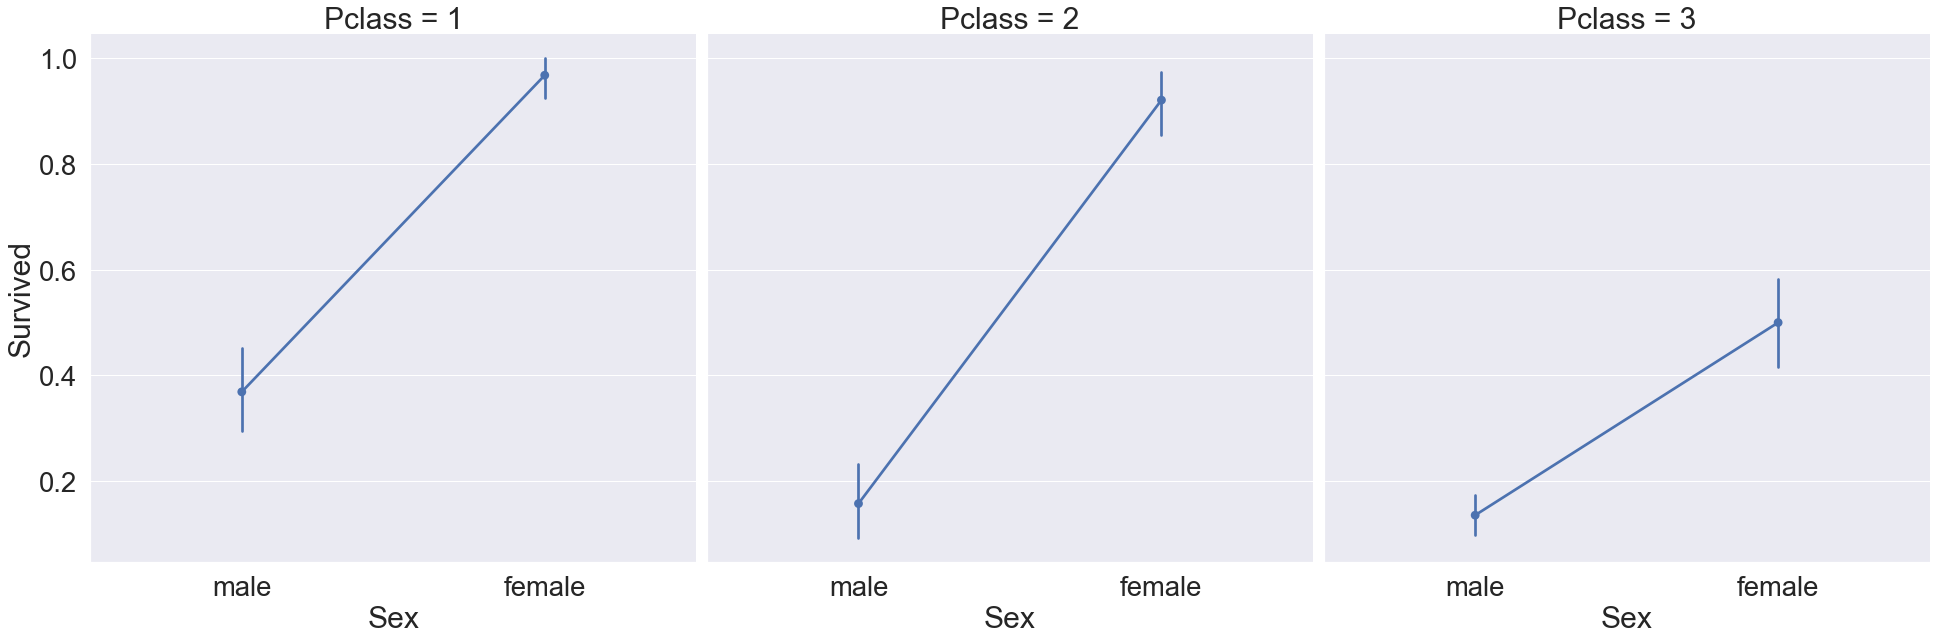

In [164]:
# Pclass, Sex Î≥Ñ ÌèâÍ∑† ÏÉùÏ°¥Î•† - factorplot
sns.factorplot(x='Sex', y='Survived', col='Pclass',
               data=df_train, saturation=0.5, size=9, aspect=1)

`üîç OBSERVATION`   
* PclassÏôÄÎäî Î¨¥Í¥ÄÌïòÍ≤å Ïó¨ÏÑ±Ïùò ÏÉùÏ°¥Î•†Ïù¥ Îß§Ïö∞ ÎÜíÎã§.
* Pclass 1,2Ïùò Ïó¨ÏÑ±ÏùÄ Í±∞Ïùò 100%Ïóê Í∞ÄÍπåÏö¥ ÏÉùÏ°¥Î•†ÏùÑ Î≥¥Ïù∏Îã§.
* Pclass 3Ïùò ÏÇ¨ÎûåÎì§ÏùÄ ÏÑ±Î≥ÑÏóê ÏÉÅÍ¥ÄÏóÜÏù¥ ÎÇÆÏùÄ ÏÉùÏ°¥Î•†ÏùÑ Î≥¥Ïù∏Îã§.
* Pclass 3Ïùò ÎÇ®ÏÑ±ÏùÄ Îß§Ïö∞ ÎÇÆÏùÄ ÏÉùÏ°¥Î•†ÏùÑ Î≥¥Ïù∏Îã§.

### 2.4. Age - Continuous

In [165]:
print('Ï†úÏùº ÎÇòÏù¥Í∞Ä ÎßéÏùÄ ÌÉëÏäπÍ∞ù : {:.1f} ÏÇ¥'.format(df_train['Age'].max()))
print('Ï†úÏùº ÎÇòÏù¥Í∞Ä Ïñ¥Î¶∞ ÌÉëÏäπÍ∞ù : {:.1f} ÏÇ¥'.format(df_train['Age'].min()))
print('ÌÉëÏäπÍ∞ùÏùò ÌèâÍ∑† ÎÇòÏù¥ : {:.1f} ÏÇ¥'.format(df_train['Age'].mean()))

Ï†úÏùº ÎÇòÏù¥Í∞Ä ÎßéÏùÄ ÌÉëÏäπÍ∞ù : 80.0 ÏÇ¥
Ï†úÏùº ÎÇòÏù¥Í∞Ä Ïñ¥Î¶∞ ÌÉëÏäπÍ∞ù : 0.4 ÏÇ¥
ÌÉëÏäπÍ∞ùÏùò ÌèâÍ∑† ÎÇòÏù¥ : 29.7 ÏÇ¥


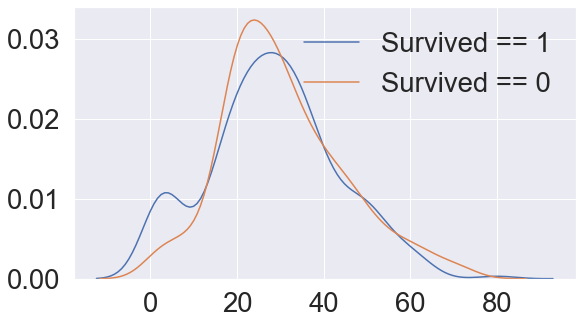

In [166]:
fig, ax = plt.subplots(1,1,figsize=(9,5))

# ÏÉùÏ°¥Ïûê/ÏÇ¨ÎßùÏûêÏùò ÎÇòÏù¥ Î∂ÑÌè¨ (ÌôïÎ•† Î∞ÄÎèÑ Ìï®Ïàò) - kdeplot
sns.kdeplot(df_train[df_train['Survived'] == 1]['Age'], ax=ax)
sns.kdeplot(df_train[df_train['Survived'] == 0]['Age'], ax=ax)

plt.legend(['Survived == 1', 'Survived == 0'])
plt.show()

`üîç OBSERVATION`   
* ÎÇòÏù¥Í∞Ä Ïñ¥Î¶∞ ÏÇ¨ÎûåÎì§Ïùò ÍΩ§ ÎßéÏùÄ ÏÇ¨ÎûåÎì§Ïù¥ ÏÉùÏ°¥ÏûêÏù¥Îã§.

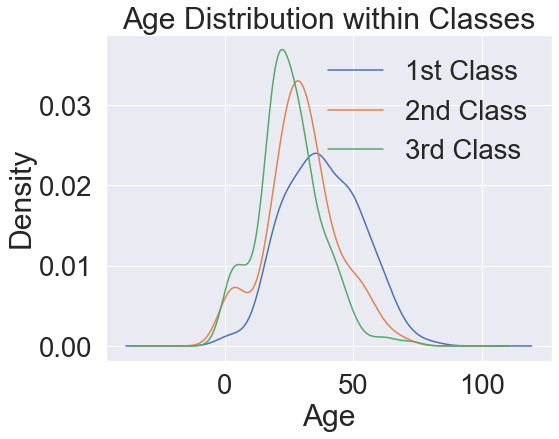

In [167]:
plt.figure(figsize=(8,6))

# ÌÅ¥ÎûòÏä§Î≥Ñ ÎÇòÏù¥ Î∂ÑÌè¨ (ÌôïÎ•†Î∞ÄÎèÑÌï®Ïàò) - kdeplot
df_train['Age'][df_train['Pclass'] == 1].plot(kind='kde')
df_train['Age'][df_train['Pclass'] == 2].plot(kind='kde')
df_train['Age'][df_train['Pclass'] == 3].plot(kind='kde')

plt.xlabel('Age')
plt.title('Age Distribution within Classes')
plt.legend(['1st Class', '2nd Class', '3rd Class'])

`üîç OBSERVATION`   
* **Pclass**Í∞Ä ÎÇÆÏùÄÏàòÎ°ù ÎÇòÏù¥Í∞Ä Ï†äÏùÄ ÏÇ¨ÎûåÎì§Ïù¥ ÎßéÎã§.
* Pclass1ÏùÄ ÎÇòÏù¥Ïùò Î∂ÑÌè¨Í∞Ä Îã§ÏñëÌïòÎã§.

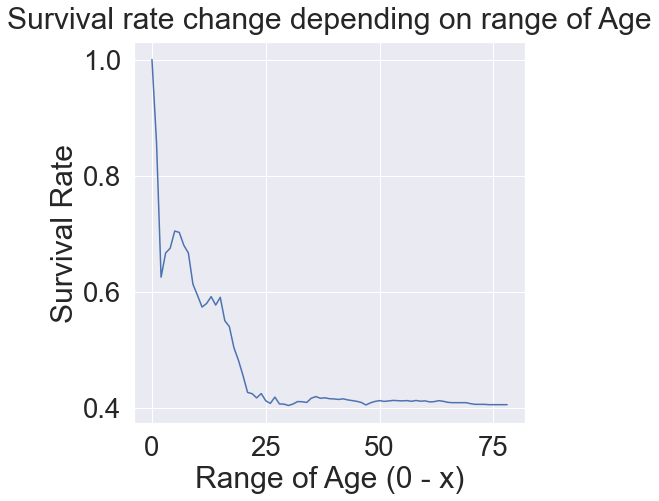

In [168]:
cummulate_survival_ratio = []

# 0ÏÇ¥ - iÏÇ¥ÍπåÏßÄÏùò ÏÉùÏ°¥Î•† Í∏∞Î°ù
for i in range(1, 80):
    # 0ÏÇ¥ - iÏÇ¥ÍπåÏßÄÏùò ÏÉùÏ°¥Ïûê / 0ÏÇ¥ - iÏÇ¥ÍπåÏßÄÏùò ÏäπÏÑ†Í∞ù (ÏÉùÏ°¥Ïûê ÎπÑÏú®)
    cummulate_survival_ratio.append(df_train[df_train['Age'] < i]['Survived'].sum() / len(df_train[df_train['Age'] < i]['Survived']))
    
# ÎàÑÏ†Å ÏÉùÏ°¥Î•† - plot
plt.figure(figsize=(7,7))
plt.plot(cummulate_survival_ratio)
plt.title('Survival rate change depending on range of Age', y=1.02)
plt.ylabel('Survival Rate')
plt.xlabel('Range of Age (0 - x)')

plt.show()

`üîç OBSERVATION`   
* ÎÇòÏù¥Í∞Ä Ïñ¥Î¶¥ÏàòÎ°ù ÏÉùÏ°¥ÎêòÏóàÎã§. ÌäπÌûà 5ÏÇ¥ - 10ÏÇ¥ Ïù¥ÌïòÏùò Ïñ¥Î¶∞ ÏïÑÏù¥Îì§.
* 15ÏÇ¥ Ï†ïÎèÑÎ∂ÄÌÑ∞ 25ÏÇ¥Ïùò Ï≤≠ÎÖÑÎì§Ïù¥ ÏÇ¨ÎßùÏûêÍ∞Ä ÎßéÏïòÎã§.

### 2.5. Pclass, Sex, Age

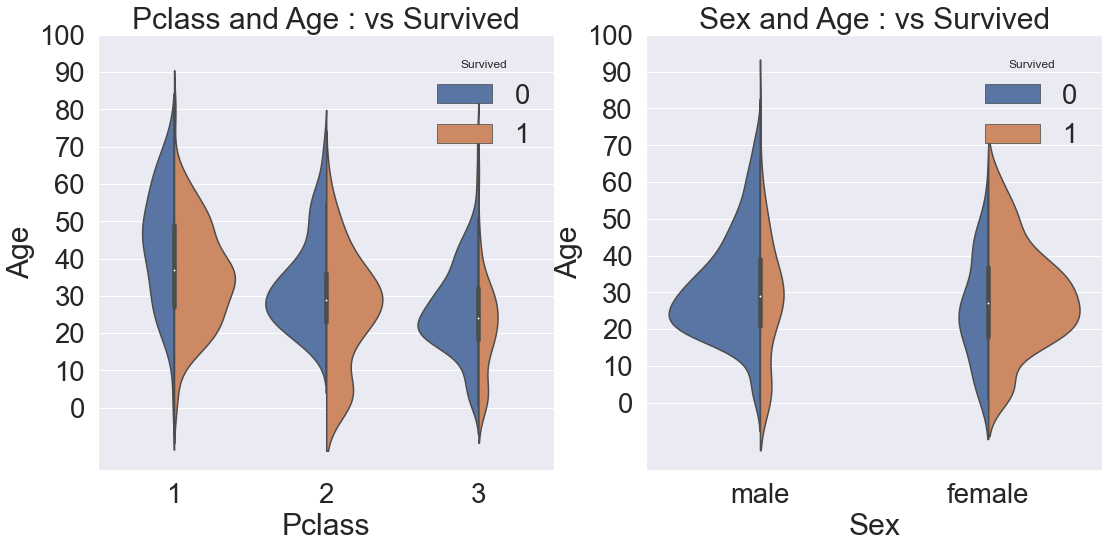

In [169]:
f, ax = plt.subplots(1, 2, figsize=(18,8))

# PclassÏôÄ AgeÏóêÏÑúÏùò ÏÉùÏ°¥Î•† Î∂ÑÌè¨ - violinplot
sns.violinplot('Pclass', 'Age', hue='Survived', data=df_train, scale='count', split=True, ax=ax[0])
ax[0].set_title('Pclass and Age : vs Survived')
ax[0].set_yticks(range(0, 110, 10))

# SexÏôÄ AgeÏóêÏÑúÏùò ÏÉùÏ°¥Î•† Î∂ÑÌè¨ - violinplot
sns.violinplot('Sex', 'Age', hue='Survived', data=df_train, scale='count', split=True, ax=ax[1])
ax[1].set_title('Sex and Age : vs Survived')
ax[1].set_yticks(range(0, 110, 10))

plt.show()

`üîç OBSERVATION`   
* ÎÇòÏù¥ÏôÄÎäî Î¨¥Í¥ÄÌïòÍ≤å Pclass3ÏùÄ ÏÇ¨ÎßùÏûêÏùò ÎπÑÏú®Ïù¥ ÎÜíÎã§.
* PclassÍ∞Ä ÎÜíÏùÑÏàòÎ°ù ÏÉùÏ°¥ÏûêÍ∞Ä ÎßéÎã§.
* Pclass1ÏùÄ ÎÇòÏù¥ÏôÄ Î¨¥Í¥ÄÌïòÍ≤å ÏÉùÏ°¥Î•†Ïù¥ ÎÜíÎã§.
* ÏÑ±Î≥Ñ, PclassÏôÄ Î¨¥Í¥ÄÌïòÍ≤å ÎÇòÏù¥Í∞Ä Ïñ¥Î¶¨Î©¥ ÏÉùÏ°¥ÎêòÏóàÎã§.
* ÎÇòÏù¥ÏôÄ Î¨¥Í¥ÄÌïòÍ≤å Ïó¨ÏÑ±Ïùò Í≤ΩÏö∞ ÏÉùÏ°¥ÎêòÏóàÎã§.
* ÎÇ®ÏÑ±Ïùò Í≤ΩÏö∞ ÏÇ¨ÎßùÏûêÍ∞Ä ÏõîÎì±Ìûà ÎßéÎã§.

### 2.6. Embarked - Categorical

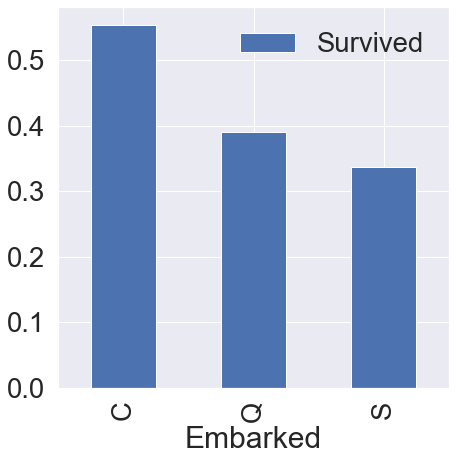

In [170]:
f, ax = plt.subplots(1, 1, figsize=(7, 7))

# EmbarkedÎ≥Ñ ÌèâÍ∑† ÏÉùÏ°¥Î•† - barplot
df_train[['Embarked', 'Survived']].groupby(['Embarked'], as_index=True).mean(
).sort_values(by='Survived', ascending=False).plot.bar(ax=ax)

`üîç OBSERVATION`   
* Ìï≠Íµ¨ C, Q, S ÏàúÏúºÎ°ú ÏÉùÏ°¥Î•†Ïù¥ ÎÜíÎã§.

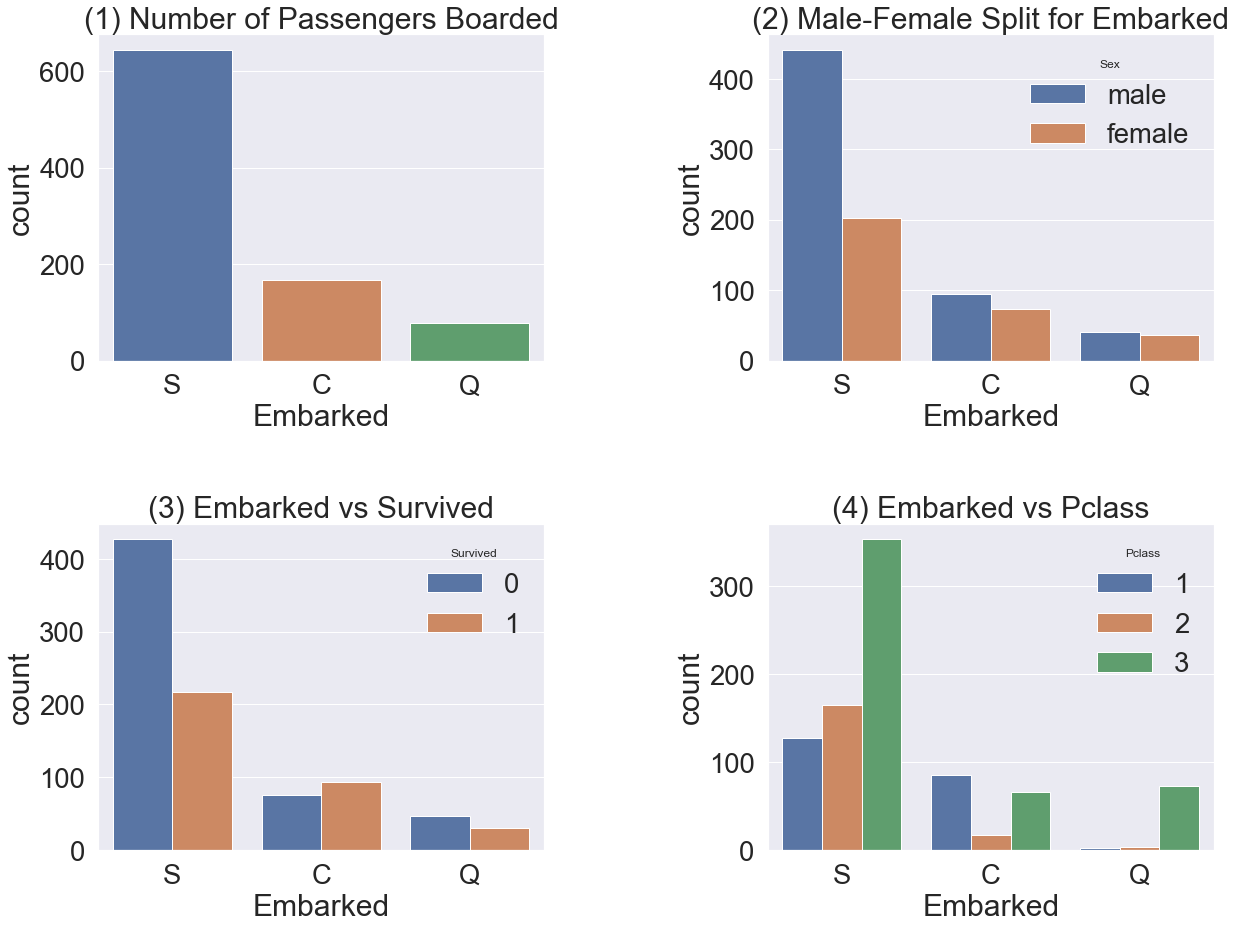

In [171]:
f, ax = plt.subplots(2, 2, figsize=(20, 15))

# ÌÉëÏäπÌïú Í≥≥Ïóê Îî∞Î•∏ ÏÇ¨Îûå Ïàò - countplot
sns.countplot('Embarked', data=df_train, ax=ax[0, 0])
ax[0, 0].set_title('(1) Number of Passengers Boarded')

# ÌÉëÏäπÌïú Í≥≥Ïóê Îî∞Î•∏ ÏÑ±Î≥Ñ Î∂ÑÌè¨ - countplot
sns.countplot('Embarked', hue='Sex', data=df_train, ax=ax[0, 1])
ax[0, 1].set_title('(2) Male-Female Split for Embarked')

# ÌÉëÏäπÌïú Í≥≥Ïóê Îî∞Î•∏ ÏÉùÏ°¥Î•† Î∂ÑÌè¨ - countplot
sns.countplot('Embarked', hue='Survived', data=df_train, ax=ax[1, 0])
ax[1, 0].set_title('(3) Embarked vs Survived')

# ÌÉëÏäπÌïú Í≥≥Ïóê Îî∞Î•∏ ÌÅ¥ÎûòÏä§ Î∂ÑÌè¨ - countplot
sns.countplot('Embarked', hue='Pclass', data=df_train, ax=ax[1, 1])
ax[1, 1].set_title('(4) Embarked vs Pclass')

plt.subplots_adjust(wspace=0.5, hspace=0.5)
plt.show()

`üîç OBSERVATION`   
* Ìï≠Íµ¨ SÏóê ÌÉÑ ÏäπÏÑ†Í∞ùÏùò ÎÇ®ÏÑ± ÎπÑÏú®Ïù¥ ÎÜíÎã§.
* Ìï≠Íµ¨ C, QÏóê ÌÉÑ ÏäπÏÑ†Í∞ùÏùò ÎÇ®ÎÖÄ ÎπÑÏú®ÏùÄ ÎπÑÎì±ÎπÑÎì±ÌïòÎã§.
* Ìï≠Íµ¨ CÏùò Í≤ΩÏö∞ ÏÉùÏ°¥ÏûêÏùò ÎπÑÏú®Ïù¥ Îçî ÎÜíÎã§.
* Ìï≠Íµ¨ SÏùò Í≤ΩÏö∞ ÏÇ¨ÎßùÏûêÏùò ÎπÑÏú®Ïù¥ ÏõîÎì±Ìûà ÎÜíÎã§.
* Ìï≠Íµ¨ SÏóêÏÑúÎäî Pclass3Ïùò ÎπÑÏú®Ïù¥ ÎÜíÎã§. ‚Üí Ìï≠Íµ¨ SÏùò ÏÇ¨ÎßùÏûê ÎπÑÏú®Ïù¥ ÎÜíÏùÄ Í≤ÉÏúºÎ°ú Ï∂îÏ∏°
* Ìï≠Íµ¨ CÏóêÏÑúÎäî Pclass1Ïùò ÎπÑÏú®Ïù¥ ÎÜíÎã§. ‚Üí Ìï≠Íµ¨ CÏùò ÏÉùÏ°¥Ïûê ÎπÑÏú®Ïù¥ ÎÜíÏùÄ Í≤ÉÏúºÎ°ú Ï∂îÏ∏°
* Ìï≠Íµ¨ QÏóêÏÑúÎäî ÎåÄÎ∂ÄÎ∂ÑÏù¥ Pclass3ÏòÄÎã§.

### 2.7. FamilySize: SibSp, Parch - Discrete

In [172]:
# FamilySize : SibSpÏôÄ ParchÎ°ú ÎßåÎì† ÏÉàÎ°úÏö¥ ÌîºÏ≤ò
df_train['FamilySize'] = df_train['SibSp'] + df_train['Parch'] + 1
df_test['FamilySize'] = df_test['SibSp'] + df_test['Parch'] + 1

In [173]:
print('Maximum siz of Family :', df_train['FamilySize'].max())
print('Minimum siz of Family :', df_train['FamilySize'].min())

Maximum siz of Family : 11
Minimum siz of Family : 1


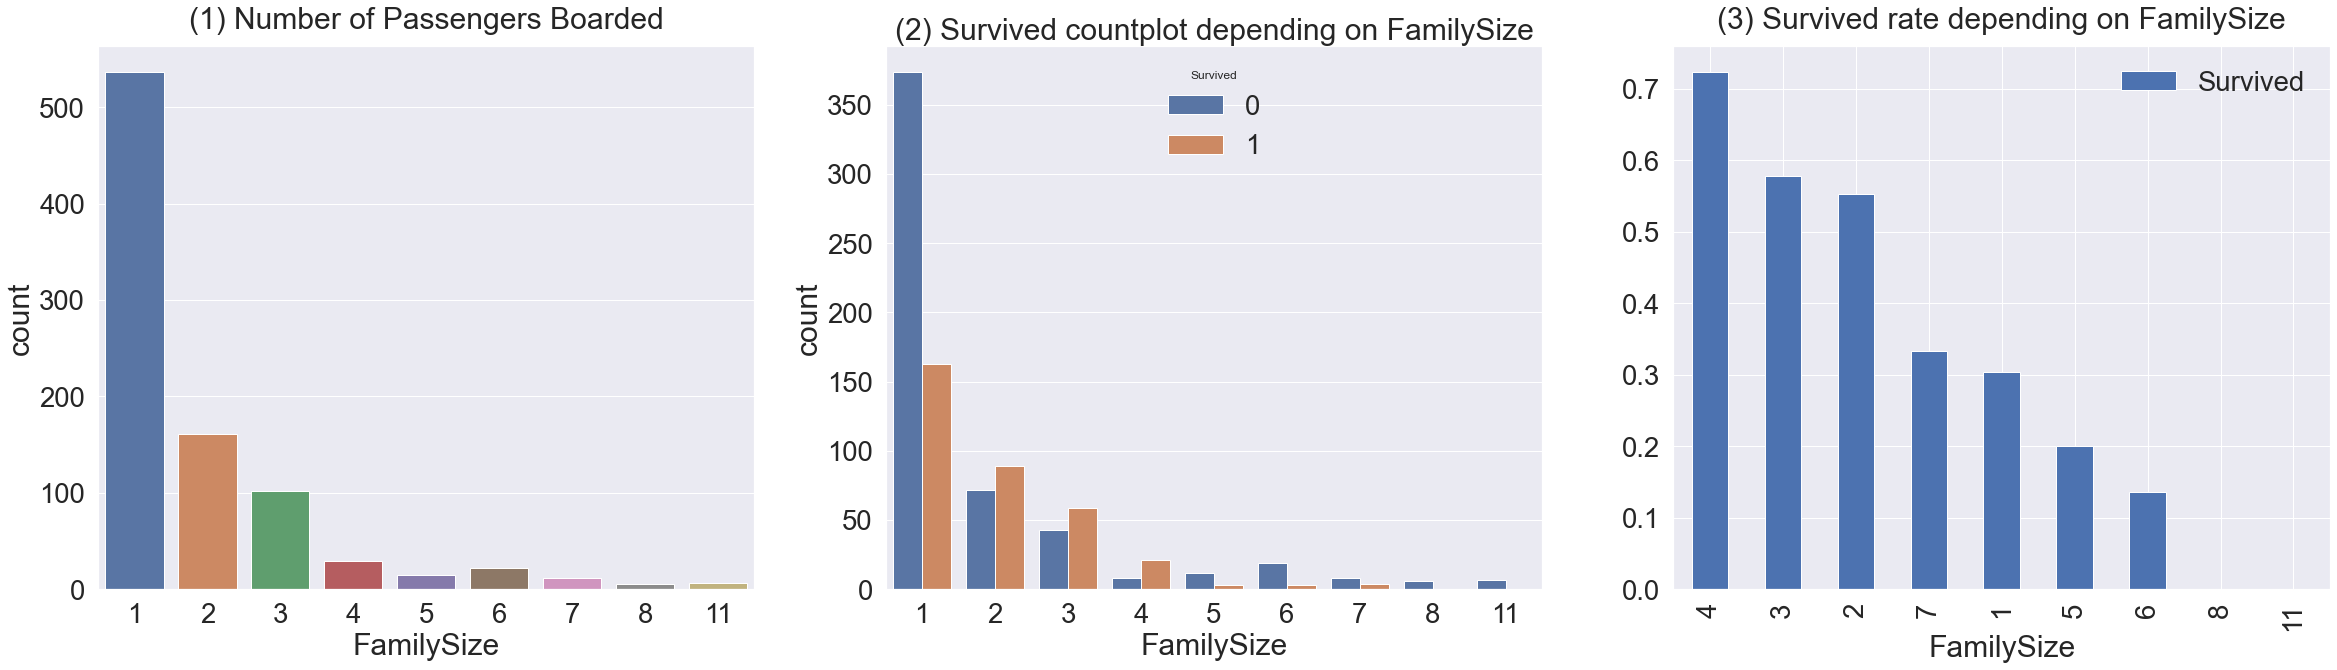

In [174]:
f, ax = plt.subplots(1, 3, figsize=(40,10))

# Í∞ÄÏ°±Ïùò ÏàòÏóê Îî∞Î•∏ ÏäπÏÑ†Í∞ù Ïàò Î∂ÑÌè¨ - countplot
sns.countplot('FamilySize', data=df_train, ax=ax[0])
ax[0].set_title('(1) Number of Passengers Boarded', y=1.02)

# Í∞ÄÏ°±Ïùò ÏàòÏóê Îî∞Î•∏ ÏÉùÏ°¥Ïûê Ïàò Î∂ÑÌè¨ - countplot
sns.countplot('FamilySize', hue='Survived', data=df_train, ax=ax[1])
ax[1].set_title('(2) Survived countplot depending on FamilySize')

# Í∞ÄÏ°±Ïùò ÏàòÏóê Îî∞Î•∏ ÏÉùÏ°¥Î•† - barplot
df_train[['FamilySize', 'Survived']].groupby(by='FamilySize', as_index=True).mean().sort_values(by='Survived', ascending=False).plot.bar(ax=ax[2])
ax[2].set_title('(3) Survived rate depending on FamilySize', y=1.02)

plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

`üîç OBSERVATION`   
* ÎåÄÎ∂ÄÎ∂ÑÏùò ÏäπÏÑ†Í∞ùÏù¥ ÌòºÏûêÏòÄÎã§.
* Í∞ÄÏ°± ÌÅ¨Í∏∞Í∞Ä 2-4Î™ÖÏù∏ Í≤ΩÏö∞ ÏÉùÏ°¥Î•†Ïù¥ ÎÜíÏïòÎã§.
* ÌòºÏûêÏù¥Í±∞ÎÇò Í∞ÄÏ°±Ïùò ÏàòÍ∞Ä 5Î™Ö Ïù¥ÏÉÅÏù∏ Í≤ΩÏö∞ ÏÉùÏ°¥Î•†Ïù¥ Îß§Ïö∞ ÎÇÆÏïòÎã§.

### 2.8. Fare - Continous

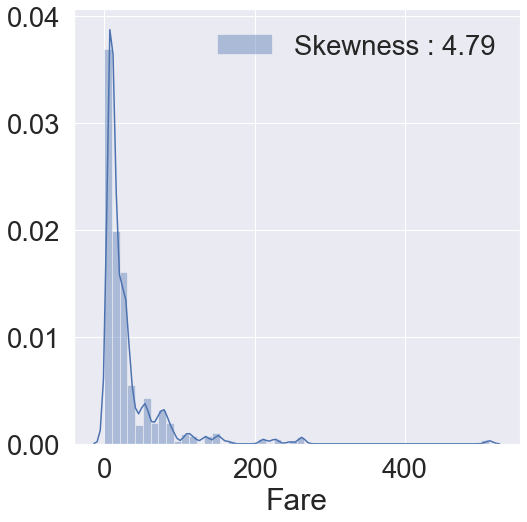

In [175]:
fig, ax = plt.subplots(1, 1, figsize=(8, 8))

# FareÏùò Î∂ÑÌè¨ - distplot
g = sns.distplot(df_train['Fare'], color='b', label='Skewness : {:.2f}'.format(
    df_train['Fare'].skew()), ax=ax)
g = g.legend(loc='best')

In [176]:
# FareÏùò nullÍ∞íÏùÑ ÌèâÍ∑†ÏúºÎ°ú Ï±ÑÏõÄ (test Îç∞Ïù¥ÌÑ∞Îßå nullÍ∞í ÏûàÏùå)
df_test.loc[df_test.Fare.isnull(), 'Fare'] = df_test['Fare'].mean()
df_test.head()

PassengerId  Pclass                                          Name     Sex  \
0          892       3                              Kelly, Mr. James    male   
1          893       3              Wilkes, Mrs. James (Ellen Needs)  female   
2          894       2                     Myles, Mr. Thomas Francis    male   
3          895       3                              Wirz, Mr. Albert    male   
4          896       3  Hirvonen, Mrs. Alexander (Helga E Lindqvist)  female   

    Age  SibSp  Parch   Ticket     Fare Cabin Embarked  FamilySize  
0  34.5      0      0   330911   7.8292   NaN        Q           1  
1  47.0      1      0   363272   7.0000   NaN        S           2  
2  62.0      0      0   240276   9.6875   NaN        Q           1  
3  27.0      0      0   315154   8.6625   NaN        S           1  
4  22.0      1      1  3101298  12.2875   NaN        S           3

In [177]:
# ÎπÑÎåÄÏπ≠ÏÑ± Ìï¥ÏÜåÎ•º ÏúÑÌï¥ logÎ•º Ï∑®Ìï¥Ï§å
df_train['Fare'] = df_train['Fare'].map(lambda x: np.log(x) if x > 0 else 0)
df_test['Fare'] = df_test['Fare'].map(lambda x: np.log(x) if x > 0 else 0)

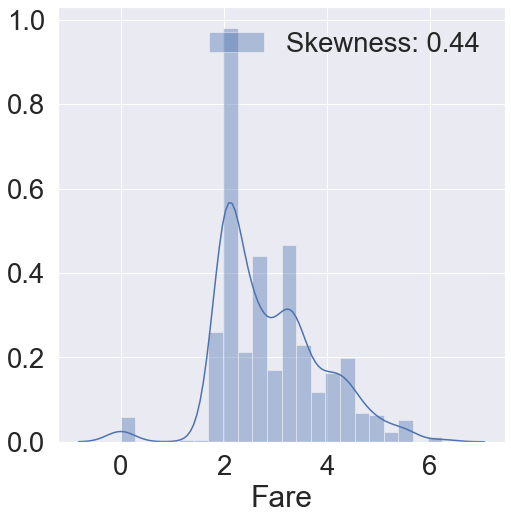

In [178]:
fig, ax = plt.subplots(1, 1, figsize=(8, 8))

# FareÏùò Î∂ÑÌè¨ - distplot
g = sns.distplot(df_train['Fare'], color='b', label='Skewness: {:.2f}'.format(
    df_train['Fare'].skew()), ax=ax)
g = g.legend(loc='best')

### 2.9. Cabin

In [179]:
# nullÍ∞íÏù¥ 80%Îùº ÏïÑÏóê Ï†úÏô∏
df_train['Cabin'].describe()

count             204
unique            147
top       C23 C25 C27
freq                4
Name: Cabin, dtype: object

### 2.10. Ticket - String

In [180]:
df_train['Ticket'].value_counts()

CA. 2343             7
347082               7
1601                 7
347088               6
3101295              6
                    ..
SOTON/OQ 3101316     1
349248               1
250652               1
248706               1
STON/O 2. 3101292    1
Name: Ticket, Length: 681, dtype: int64

## 3. Feature Engineering

### 3.1. Fill null

#### 3.1.1. Fill Null in Age using Title

In [181]:
# Title Ï∂îÏ∂ú
df_train['Initial'] = df_train.Name.str.extract('([A-Za-z]+)\.')
df_test['Initial'] = df_test.Name.str.extract('([A-Za-z]+)\.')

In [182]:
# InitialÍ≥º SexÎ≥Ñ ÏÇ¨ÎûåÏùò Ïàò - crosstab
pd.crosstab(df_train['Initial'], df_train['Sex']
            ).T.style.background_gradient(cmap='summer_r')

In [183]:
# ÏûòÎ™ªÎêú Initial Í≥†ÏπòÍ∏∞
df_train['Initial'].replace(['Mlle', 'Mme', 'Ms', 'Dr', 'Major', 'Lady', 'Countess', 'Jonkheer', 'Col', 'Rev', 'Capt', 'Sir', 'Don', 'Dona'], [
                            'Miss', 'Miss', 'Miss', 'Mr', 'Mr', 'Mrs', 'Mrs', 'Other', 'Other', 'Other', 'Mr', 'Mr', 'Mr', 'Mr'], inplace=True)
df_test['Initial'].replace(['Mlle', 'Mme', 'Ms', 'Dr', 'Major', 'Lady', 'Countess', 'Jonkheer', 'Col', 'Rev', 'Capt', 'Sir', 'Don', 'Dona'], [
    'Miss', 'Miss', 'Miss', 'Mr', 'Mr', 'Mrs', 'Mrs', 'Other', 'Other', 'Other', 'Mr', 'Mr', 'Mr', 'Mr'], inplace=True)

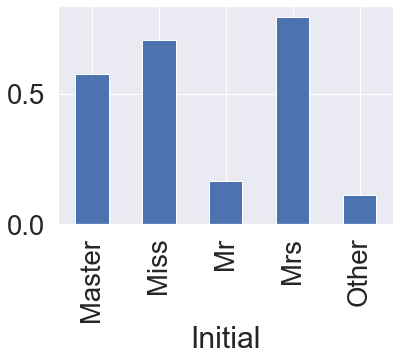

In [184]:
# InitialÏóê Îî∞Î•∏ ÌèâÍ∑† ÏÉùÏ°¥Î•† - barplot
df_train.groupby(by='Initial')['Survived'].mean().plot.bar()

`üîç OBSERVATION`   
* ÌèâÍ∑† ÎÇòÏù¥Í∞Ä 4ÏÇ¥Ïù∏ **Master**Ïùò Í≤ΩÏö∞ ÏÉùÏ°¥Î•†Ïù¥ ÎÜíÏïòÎã§.
* Ïó¨ÏûêÏóê Ìï¥ÎãπÌïòÎäî **Miss**ÏôÄ **Mrs**Ïùò Í≤ΩÏö∞ ÏÉùÏ°¥Î•†Ïù¥ ÎÜíÏïòÎã§.

In [185]:
# InitialÏóê Îî∞Î•∏ ÌîºÏ≤òÎì§Ïùò ÌèâÍ∑† Í∞íÎì§ - mean()
df_train.groupby(by='Initial').mean()

PassengerId  Survived    Pclass        Age     SibSp     Parch  \
Initial                                                                   
Master    414.975000  0.575000  2.625000   4.574167  2.300000  1.375000   
Miss      411.741935  0.704301  2.284946  21.860000  0.698925  0.537634   
Mr        455.880907  0.162571  2.381853  32.739609  0.293006  0.151229   
Mrs       456.393701  0.795276  1.984252  35.981818  0.692913  0.818898   
Other     564.444444  0.111111  1.666667  45.888889  0.111111  0.111111   

             Fare  FamilySize  
Initial                        
Master   3.340710    4.675000  
Miss     3.123713    2.236559  
Mr       2.651507    1.444234  
Mrs      3.443751    2.511811  
Other    2.641605    1.222222

In [186]:
# train Îç∞Ïù¥ÌÑ∞Ïùò Age null Í∞í Ï±ÑÏö∞Í∏∞
# InitialÎ≥Ñ Age ÌèâÍ∑† Í∞íÏúºÎ°ú Ï±ÑÏõÄ
df_train.loc[(df_train.Age.isnull()) & (df_train.Initial == 'Mr'), 'Age'] = 33
df_train.loc[(df_train.Age.isnull()) & (df_train.Initial == 'Mrs'), 'Age'] = 36
df_train.loc[(df_train.Age.isnull()) & (
    df_train.Initial == 'Master'), 'Age'] = 5
df_train.loc[(df_train.Age.isnull()) & (
    df_train.Initial == 'Miss'), 'Age'] = 22
df_train.loc[(df_train.Age.isnull()) & (
    df_train.Initial == 'Other'), 'Age'] = 46

In [187]:
# test Îç∞Ïù¥ÌÑ∞Ïùò Age null Í∞í Ï±ÑÏö∞Í∏∞
# Ïù¥ Îïå Ï†àÎåÄÎ°ú test Îç∞Ïù¥ÌÑ∞Ïùò ÌèâÍ∑†ÏúºÎ°ú ÎÑ£ÏúºÎ©¥ ÏïàÎê®
# train Îç∞Ïù¥ÌÑ∞ÏóêÏÑú ÌÜµÍ≥Ñ ÎÇ∏ Í∞íÏùÑ ÎÑ£Ïñ¥Ïïº Ìï®
df_test.loc[(df_test.Age.isnull()) & (df_test.Initial == 'Mr'), 'Age'] = 33
df_test.loc[(df_test.Age.isnull()) & (df_test.Initial == 'Mrs'), 'Age'] = 36
df_test.loc[(df_test.Age.isnull()) & (df_test.Initial == 'Master'), 'Age'] = 5
df_test.loc[(df_test.Age.isnull()) & (df_test.Initial == 'Miss'), 'Age'] = 22
df_test.loc[(df_test.Age.isnull()) & (df_test.Initial == 'Other'), 'Age'] = 46

### 3.1.2. Fill Null in Embarked

In [188]:
# EmbarkedÏùò null Í∞í Í∞úÏàò
print('Number of Embarked Null Value :', sum(df_train['Embarked'].isnull()))

Number of Embarked Null Value : 2


In [189]:
# Í∞ÄÏû• ÎßéÏùÄ S Ìï≠Íµ¨Î°ú nullÍ∞íÏùÑ Ï±ÑÏõÄ
df_train['Embarked'].fillna('S', inplace=True)

In [190]:
# nullÍ∞íÏù¥ ÏûàÎäîÏßÄ Í≤ÄÏÇ¨
df_train['Embarked'].isnull().any()

False

### 3.2. Change Age: continuous to categorical

In [191]:
# Î∞©Î≤ï 2 : applyÏôÄ Îî∞Î°ú Ï†ïÏùòÎêú Ìï®ÏàòÎ•º Ïù¥Ïö©ÌïòÏó¨ Î≥ÄÌôò
def category_age(x):
    if x < 10:
        return 0
    elif x < 20:
        return 1
    elif x < 30:
        return 2
    elif x < 40:
        return 3
    elif x < 50:
        return 4
    elif x < 60:
        return 5
    elif x < 70:
        return 6
    else:
        return 7


# Age_cat : AgeÎ•º Ïπ¥ÌÖåÍ≥†Î¶¨Ìôî ÏãúÌÇ® ÏÉàÎ°úÏö¥ ÌîºÏ≤ò ÏÉàÏÑ±
df_train['Age_cat'] = df_train['Age'].apply(category_age)
df_test['Age_cat'] = df_test['Age'].apply(category_age)

# ÎçîÏù¥ÏÉÅ ÌïÑÏöîÏóÜÎäî Age ÌîºÏ≤ò ÏÇ≠Ï†ú
df_train.drop(['Age'], axis=1, inplace=True)
df_test.drop(['Age'], axis=1, inplace=True)

In [192]:
df_test.head()

PassengerId  Pclass                                          Name     Sex  \
0          892       3                              Kelly, Mr. James    male   
1          893       3              Wilkes, Mrs. James (Ellen Needs)  female   
2          894       2                     Myles, Mr. Thomas Francis    male   
3          895       3                              Wirz, Mr. Albert    male   
4          896       3  Hirvonen, Mrs. Alexander (Helga E Lindqvist)  female   

   SibSp  Parch   Ticket      Fare Cabin Embarked  FamilySize Initial  Age_cat  
0      0      0   330911  2.057860   NaN        Q           1      Mr        3  
1      1      0   363272  1.945910   NaN        S           2     Mrs        4  
2      0      0   240276  2.270836   NaN        Q           1      Mr        6  
3      0      0   315154  2.159003   NaN        S           1      Mr        2  
4      1      1  3101298  2.508582   NaN        S           3     Mrs        2

In [193]:
df_test.head()

PassengerId  Pclass                                          Name     Sex  \
0          892       3                              Kelly, Mr. James    male   
1          893       3              Wilkes, Mrs. James (Ellen Needs)  female   
2          894       2                     Myles, Mr. Thomas Francis    male   
3          895       3                              Wirz, Mr. Albert    male   
4          896       3  Hirvonen, Mrs. Alexander (Helga E Lindqvist)  female   

   SibSp  Parch   Ticket      Fare Cabin Embarked  FamilySize Initial  Age_cat  
0      0      0   330911  2.057860   NaN        Q           1      Mr        3  
1      1      0   363272  1.945910   NaN        S           2     Mrs        4  
2      0      0   240276  2.270836   NaN        Q           1      Mr        6  
3      0      0   315154  2.159003   NaN        S           1      Mr        2  
4      1      1  3101298  2.508582   NaN        S           3     Mrs        2

### 3.3. Change Initial, Embarked, Sex : string to numerical

In [194]:
# Initial
df_train['Initial'] = df_train['Initial'].map(
    {'Master': 0, 'Miss': 1, 'Mr': 2, 'Mrs': 3, 'Other': 4})
df_test['Initial'] = df_test['Initial'].map(
    {'Master': 0, 'Miss': 1, 'Mr': 2, 'Mrs': 3, 'Other': 4})

In [195]:
# Embarked
df_train['Embarked'] = df_train['Embarked'].map({'C': 0, 'Q': 1, 'S': 2})
df_test['Embarked'] = df_test['Embarked'].map({'C': 0, 'Q': 1, 'S': 2})

In [196]:
# Sex
df_train['Sex'] = df_train['Sex'].map({'female': 0, 'male': 1})
df_test['Sex'] = df_test['Sex'].map({'female': 0, 'male': 1})

### 3.5. Î™®Îì† Feature Í∞ÑÏùò ÏÉÅÍ¥Ä Í¥ÄÍ≥Ñ

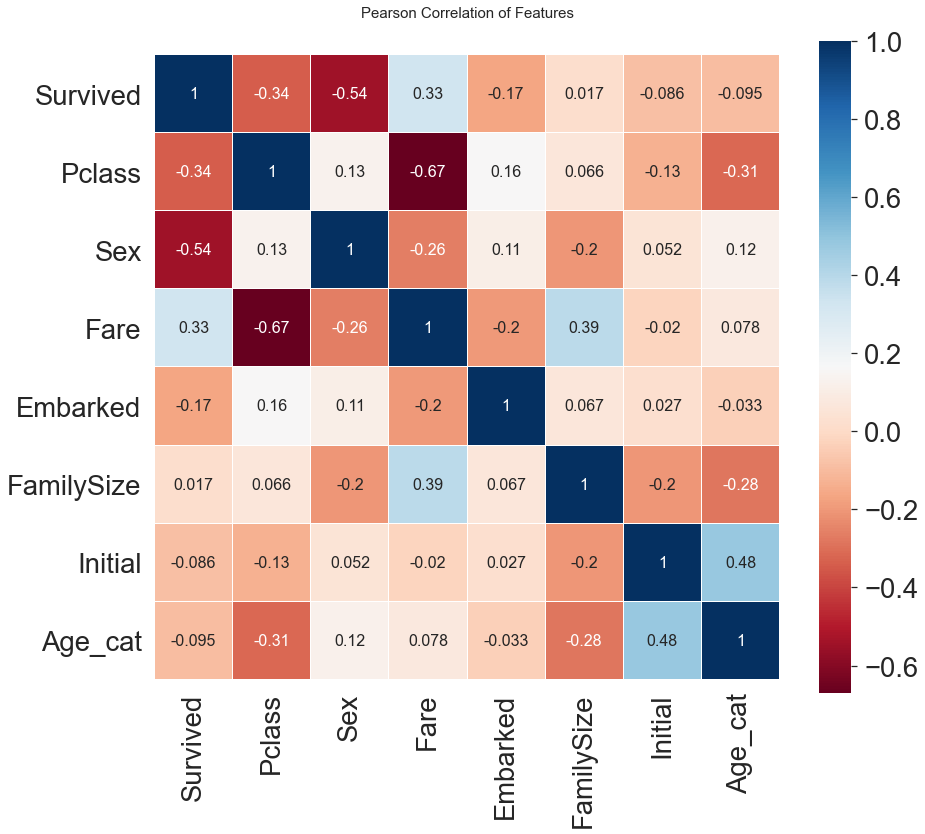

In [197]:
heatmap_data = df_train[['Survived', 'Pclass', 'Sex',
                         'Fare', 'Embarked', 'FamilySize', 'Initial', 'Age_cat']]

colormap = plt.cm.RdBu

plt.figure(figsize=(14, 12))
plt.title('Pearson Correlation of Features', y=1.05, size=15)
sns.heatmap(heatmap_data.astype(float).corr(), linewidths=0.1, vmax=1.0, square=True,
            cmap=colormap, linecolor='white', annot=True, annot_kws={'size': 16})

del heatmap_data

`üîç OBSERVATION`   
* **Pclass**, **Sex**, **Fare**Í∞Ä ÏÉùÏ°¥Î•†Í≥º ÏÉÅÍ¥ÄÍ¥ÄÍ≥ÑÍ∞Ä ÎÜíÎã§.
* ÏÑúÎ°ú ÏÉÅÍ¥ÄÍ¥ÄÍ≥ÑÍ∞Ä ÎÜíÏùÄ ÌîºÏ≤òÎäî ÏóÜÏúºÎØÄÎ°ú ÌîºÏ≤ò Ï§ë Î∂àÌïÑÏöîÌïú ÌîºÏ≤òÎäî ÏóÜÎã§.

### 3.4. One-hot encoding on Initial and Embarked

In [198]:
# Initial Encoding
df_train = pd.get_dummies(df_train, columns=['Initial'], prefix='Initial')
df_test = pd.get_dummies(df_test, columns=['Initial'], prefix='Initial')

In [199]:
df_train.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name  Sex  SibSp  Parch  \
0                            Braund, Mr. Owen Harris    1      1      0   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...    0      1      0   
2                             Heikkinen, Miss. Laina    0      0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)    0      1      0   
4                           Allen, Mr. William Henry    1      0      0   

             Ticket      Fare Cabin  Embarked  FamilySize  Age_cat  Initial_0  \
0         A/5 21171  1.981001   NaN         2           2        2          0   
1          PC 17599  4.266662   C85         0           2        3          0   
2  STON/O2. 3101282  2.070022   NaN         2           1        2          0   
3            113803  3.972177  C123         2           2        3          0   
4            373450  2.085672   NaN         2           1        3          0   

   Initial_1  Initial_2  Initial_3  Initial_4  
0          0          1          0          0  
1          0          0          1          0  
2          1          0          0          0  
3          0          0          1          0  
4          0          1          0          0

In [200]:
# Embarked Encoding
df_train = pd.get_dummies(df_train, columns=['Embarked'], prefix='Embarked')
df_test = pd.get_dummies(df_test, columns=['Embarked'], prefix='Embarked')

In [201]:
df_train.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name  Sex  SibSp  Parch  \
0                            Braund, Mr. Owen Harris    1      1      0   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...    0      1      0   
2                             Heikkinen, Miss. Laina    0      0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)    0      1      0   
4                           Allen, Mr. William Henry    1      0      0   

             Ticket      Fare Cabin  FamilySize  Age_cat  Initial_0  \
0         A/5 21171  1.981001   NaN           2        2          0   
1          PC 17599  4.266662   C85           2        3          0   
2  STON/O2. 3101282  2.070022   NaN           1        2          0   
3            113803  3.972177  C123           2        3          0   
4            373450  2.085672   NaN           1        3          0   

   Initial_1  Initial_2  Initial_3  Initial_4  Embarked_0  Embarked_1  \
0          0          1          0          0           0           0   
1          0          0          1          0           1           0   
2          1          0          0          0           0           0   
3          0          0          1          0           0           0   
4          0          1          0          0           0           0   

   Embarked_2  
0           1  
1           0  
2           1  
3           1  
4           1

### 3.5. Drop Columns

In [202]:
df_train.drop(['PassengerId', 'Name', 'SibSp', 'Parch',
               'Ticket', 'Cabin'], axis=1, inplace=True)
df_test.drop(['PassengerId', 'Name', 'SibSp', 'Parch',
              'Ticket', 'Cabin'], axis=1, inplace=True)

In [203]:
df_train.head()

Survived  Pclass  Sex      Fare  FamilySize  Age_cat  Initial_0  Initial_1  \
0         0       3    1  1.981001           2        2          0          0   
1         1       1    0  4.266662           2        3          0          0   
2         1       3    0  2.070022           1        2          0          1   
3         1       1    0  3.972177           2        3          0          0   
4         0       3    1  2.085672           1        3          0          0   

   Initial_2  Initial_3  Initial_4  Embarked_0  Embarked_1  Embarked_2  
0          1          0          0           0           0           1  
1          0          1          0           1           0           0  
2          0          0          0           0           0           1  
3          0          1          0           0           0           1  
4          1          0          0           0           0           1

In [204]:
df_test.head()

Pclass  Sex      Fare  FamilySize  Age_cat  Initial_0  Initial_1  \
0       3    1  2.057860           1        3          0          0   
1       3    0  1.945910           2        4          0          0   
2       2    1  2.270836           1        6          0          0   
3       3    1  2.159003           1        2          0          0   
4       3    0  2.508582           3        2          0          0   

   Initial_2  Initial_3  Initial_4  Embarked_0  Embarked_1  Embarked_2  
0          1          0          0           0           1           0  
1          0          1          0           0           0           1  
2          1          0          0           0           1           0  
3          1          0          0           0           0           1  
4          0          1          0           0           0           1

## 4. Building Model and Prediction using the Trained Model

In [205]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.model_selection import train_test_split

### 4.1. Preparation : Split dataset into train, valid, test set

In [206]:
# target labelÏùÑ Îç∞Ïù¥ÌÑ∞ÏÖãÏóêÏÑú Î∂ÑÎ¶¨
X_train = df_train.drop('Survived', axis=1).values
target_label = df_train['Survived'].values
X_test = df_test.values

In [207]:
# trainÍ≥º valid setÏúºÎ°ú Î∂ÑÎ¶¨
X_tr, X_vld, y_tr, y_vld = train_test_split(
    X_train, target_label, test_size=0.3, random_state=2020)

### 4.2. Model Generation and Prediction

In [208]:
# random forest Î™®Îç∏ ÏÉùÏÑ±
model = RandomForestClassifier()
model.fit(X_tr, y_tr)    # ÌïôÏäµ
pred = model.predict(X_vld)    # ÏòàÏ∏°

In [209]:
print('Accuracy : {}%'.format(100 * metrics.accuracy_score(pred, y_vld)))

Accuracy : 80.97014925373134%


### 4.3. Feature Importance

In [210]:
from pandas import Series

# feature importance Ï∂îÏ∂ú
feature_importance = model.feature_importances_
Series_feat_imp = Series(feature_importance, index=df_test.columns)

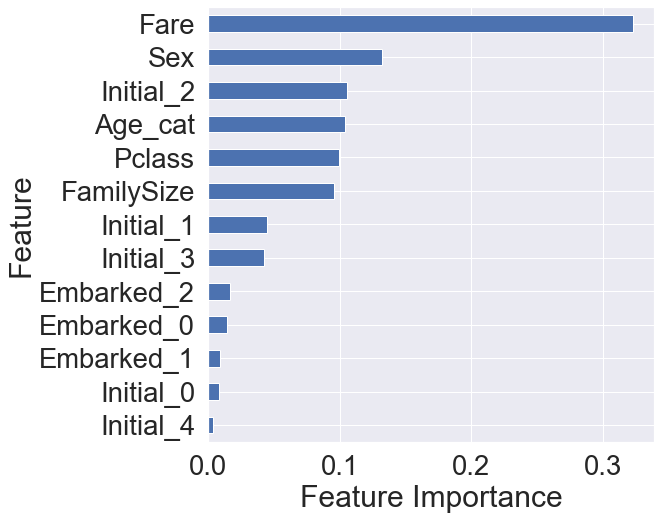

In [211]:
plt.figure(figsize=(8,8))

Series_feat_imp.sort_values(ascending=True).plot.barh()
plt.xlabel('Feature Importance')
plt.ylabel('Feature')

plt.show()

`üîç OBSERVATION`   
* **Fare**, **Sex**, **Initial_2**, **Age_cat**, **Pclass**, **FamilySize** ÏàúÏúºÎ°ú Ï§ëÏöîÎèÑÍ∞Ä ÎÜíÎã§.
* FareÍ∞Ä Í∞ÄÏû• ÌÅ∞ ÏòÅÌñ•Î†•ÏùÑ Ï∞®ÏßÄÌïòÏßÄÎßå Ìï¥Îãπ Î™®Îç∏ÏóêÏÑúÎßå Ìï¥ÎãπÎêòÎäî Í≤ΩÏö∞Ïùº Ïàò ÏûàÏúºÎØÄÎ°ú Îî∞Î°ú ÌÜµÍ≥ÑÎ•º ÎÇ¥Î≥¥ÏïÑÏïº ÌïúÎã§.

### 4.4. Prediction on Test Set

In [212]:
# submission ÌååÏùº Î°úÎìú
submission = pd.read_csv('../data/gender_submission.csv')
submission.head()

PassengerId  Survived
0          892         0
1          893         1
2          894         0
3          895         0
4          896         1

In [213]:
# ÏòàÏ∏° ÌõÑ submission ÌååÏùºÏóê Ï†ÄÏû•
pred = model.predict(X_test)
submission['Survived'] = pred
submission.to_csv('../data/youhanlee_submission_3.csv', index=False)
submission.head()

PassengerId  Survived
0          892         0
1          893         0
2          894         0
3          895         0
4          896         1